In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.cm as cm
import seaborn as sns
from sklearn import preprocessing

In [143]:
def get_top_keywords(n_terms, clusters):
    df = pd.DataFrame(X).groupby(clusters).mean()
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(' '.join([terms[t] for t in np.argsort(r)[-n_terms:]]))

In [144]:
def plot_reduced(df, x0, x1, clusters, name_map, title):
  df['cluster'] = clusters
  df['cluster'] = df['cluster'].map(name_map)
  df['x0'] = x0
  df['x1'] = x1

  palette_colors = ['purple', 'turquoise', 'orange']
  palette = {key: palette_colors[i] for i, key in enumerate(name_map.values())}

  plt.figure(figsize=(10, 7))
  plt.title(title, fontdict={"fontsize": 18})
  sns.scatterplot(data=df, x='x0', y='x1', hue='cluster', palette=palette)
  plt.show()

  df.drop(['cluster', 'x0', 'x1'], axis=1, inplace=True)

In [145]:
def plot_3d(df, x, y, z, clusters):
  df['cluster'] = clusters
  df['x'] = x
  df['y'] = y
  df['z'] = z

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')

  scatter = ax.scatter(df['x'], df['y'], df['z'], c=df['cluster'], cmap='viridis')
  colorbar = plt.colorbar(scatter)
  plt.show()

  df.drop(['cluster', 'x', 'y', 'z'], axis=1, inplace=True)

In [146]:
def plot_metrics(K, inertias, silhouettes):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

  ax1.plot(K, inertias, 'rx-')
  ax1.set_xlabel('Values of K')
  ax1.set_ylabel('Inertia')
  ax1.set_title('Inertia')

  ax2.plot(K, silhouettes, 'bx-')
  ax2.set_xlabel('Values of K')
  ax2.set_ylabel('Silhouettes')
  ax2.set_title('Silhouettes')

  plt.tight_layout()
  plt.show()

In [147]:
def plot_iterations(df, reduced_matrix):

  inertias = []
  silhouettes = []
  clusters = []
  K = range(2, 10)

  best_silhouette = 0
  best_model = 0

  fig, axs = plt.subplots(4, 2, figsize=(10, 12))

  for i, k in enumerate(K):

    row = i // 2
    col = i % 2

    kmeans = KMeans(n_clusters=k, init='k-means++', n_init = 10)
    y_kmeans = kmeans.fit_predict(df)

    ax = axs[row, col]
    ax.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], c=y_kmeans)
    if not isinstance(df, pd.DataFrame):
      ax.scatter(kmeans.cluster_centers_[:, 0],
                kmeans.cluster_centers_[:, 1],
                s=70, c='red', marker='x')
    ax.set_title('(k={})'.format(k))

    current_silhouette = silhouette_score(lsa_matrix, kmeans.labels_)
    inertias.append(kmeans.inertia_)
    silhouettes.append(current_silhouette)
    clusters.append(y_kmeans)

    if current_silhouette > best_silhouette:
      best_silhouette = current_silhouette
      best_model = kmeans

    ax.text(0.05, 0.95,
            'Inertia: {:.2f}\nSilhouette: {:.2f}'.format(inertias[i], silhouettes[i]),
            verticalalignment='top',
            horizontalalignment='left',
            transform=ax.transAxes,
            fontsize=10,
            bbox={'facecolor': 'white', 'alpha': 0.7, 'pad': 5})

  plt.tight_layout()
  plt.show()
  return K, inertias, silhouettes, clusters, best_model

In [148]:
data = pd.read_csv('../pretprocesiranje/cluster_data.csv')

In [149]:
terms = data.columns.tolist()

#**KMeans**

kmeans sa 3 klastera jer znamo da imamo 3 klase :) pa smenjanja dimenzionalnosti da bismo vizualizovali cisto da vidimo kako su rasporedjeni

In [150]:
X = data.copy()

In [151]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [152]:
get_top_keywords(10, clusters)


Cluster 0
phd magic youtube degree cream ice mushroom chemistry physic look

Cluster 1
effect research year sense solution science electron matter make thing

Cluster 2
sidebar hell physicsmemes mod username question explain stop check please


In [153]:
cluster_map = {0: "biology", 1: "chemistry", 2: "physics"}

#kmeans + PCA

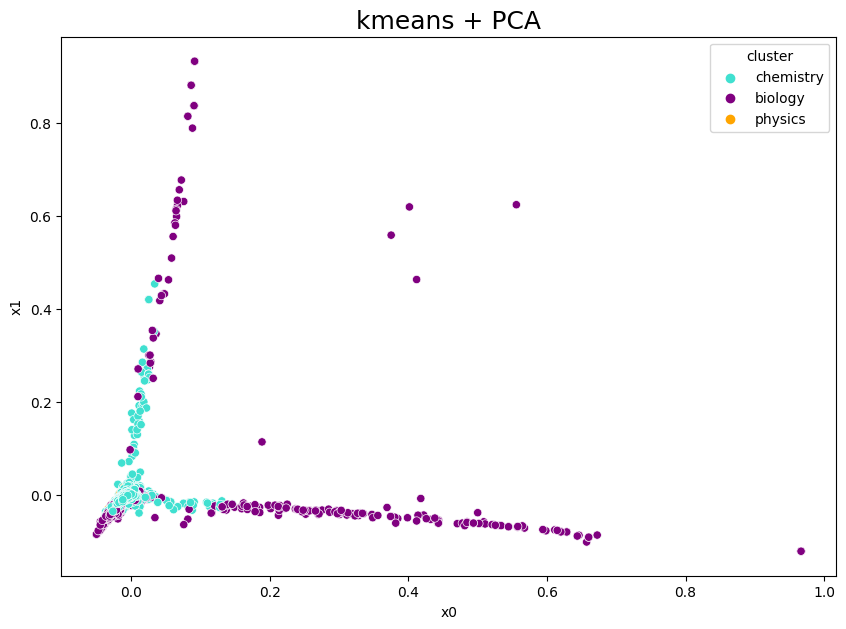

In [154]:
pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X.values)
x0, x1 = pca_vecs[:, 0], pca_vecs[:, 1]
plot_reduced(X, x0, x1, clusters, cluster_map, "kmeans + PCA")

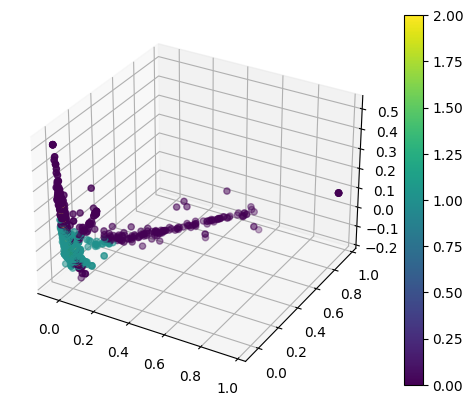

In [155]:
pca = PCA(n_components=3, random_state=42)
pca_vecs = pca.fit_transform(X.values)
x, y, z = pca_vecs[:, 0], pca_vecs[:, 0], pca_vecs[:, 2]
plot_3d(X, x, y, z, clusters)

# kmeans + LSA

za smanjenje dimenzionalnosti teksta se obicno koristi lsa, a ne pca

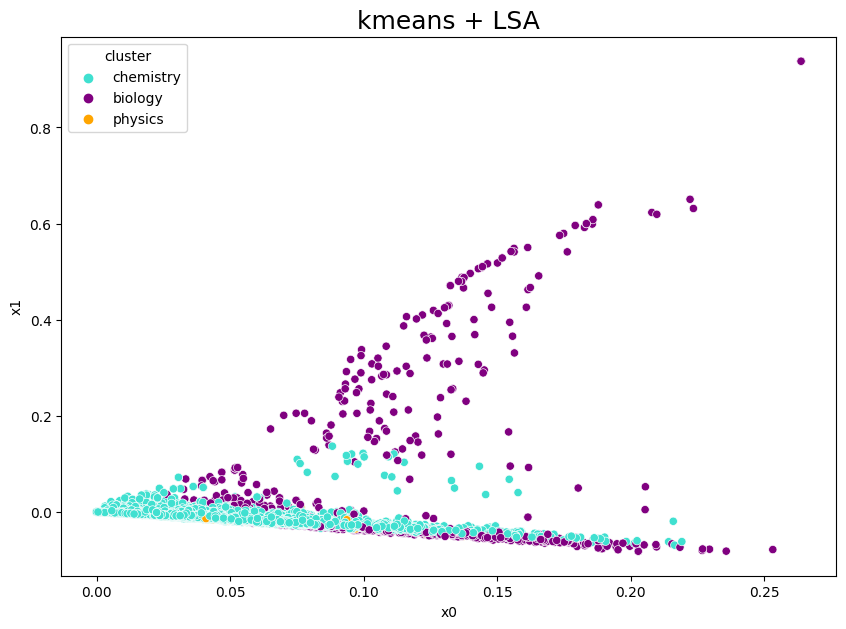

In [156]:
lsa = TruncatedSVD(n_components=2, random_state=42)
lsa_matrix = lsa.fit_transform(X)
x0, x1 = lsa_matrix[:, 0], lsa_matrix[:, 1]
plot_reduced(X, x0, x1, clusters, cluster_map, "kmeans + LSA")

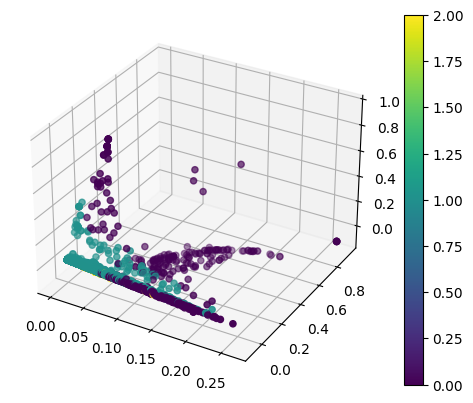

In [157]:
lsa = TruncatedSVD(n_components=3, random_state=42)
lsa_matrix = lsa.fit_transform(X)
x, y, z = lsa_matrix[:, 0], lsa_matrix[:, 1], lsa_matrix[:, 2]
plot_3d(X, x, y, z, clusters)

#kmeans + tSNE

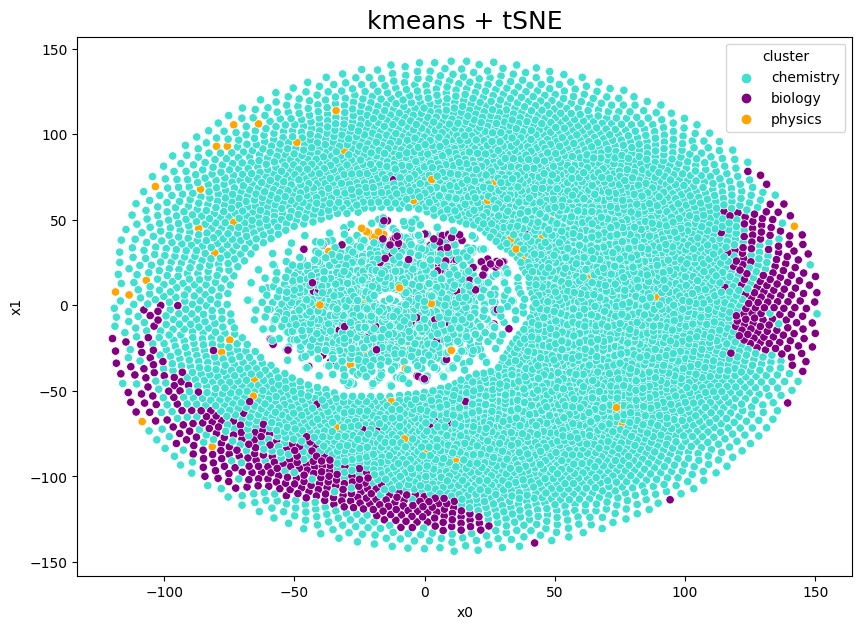

In [158]:
tsne = TSNE(n_components=2, random_state=42)
tsne_matrix = tsne.fit_transform(X)
x0, x1 = tsne_matrix[:, 0], tsne_matrix[:, 1]
plot_reduced(X, x0, x1, clusters, cluster_map, "kmeans + tSNE")

#Prikaz pravih klasa i odnos sa dodeljenim

In [159]:
train = pd.read_csv('../pretprocesiranje/train_data.csv')
test = pd.read_csv('../pretprocesiranje/test_data.csv')

In [160]:
combined_df = pd.concat([train, test], axis=0)
combined_df.reset_index(drop=True, inplace=True)

In [161]:
clusters = combined_df['0']

In [162]:
lsa = TruncatedSVD(n_components=2, random_state=42)
lsa_matrix = lsa.fit_transform(X)
x0, x1 = lsa_matrix[:, 0], lsa_matrix[:, 1]
cluster_map = {0: "biology", 1: "chemistry", 2: "physics"}

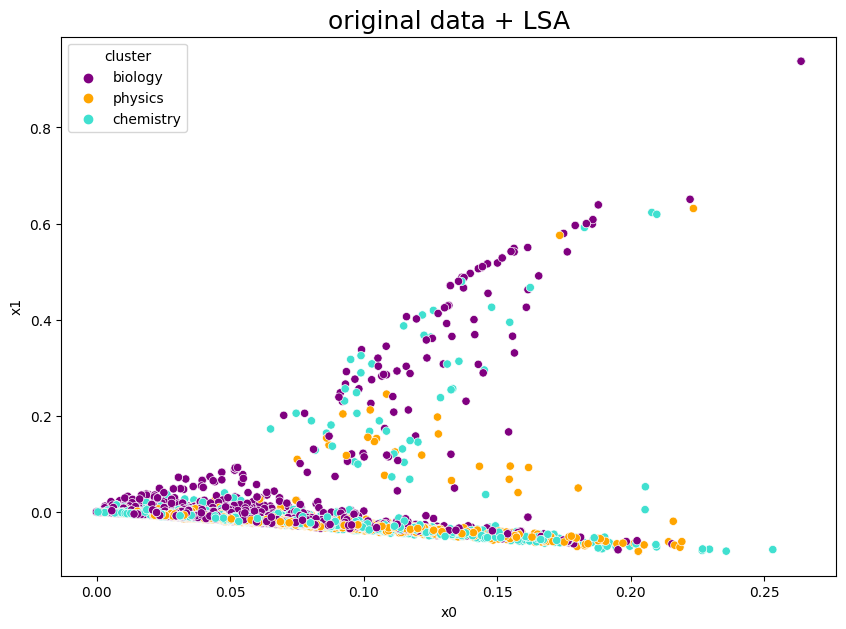

In [163]:
plot_reduced(X, x0, x1, clusters, cluster_map, "original data + LSA")

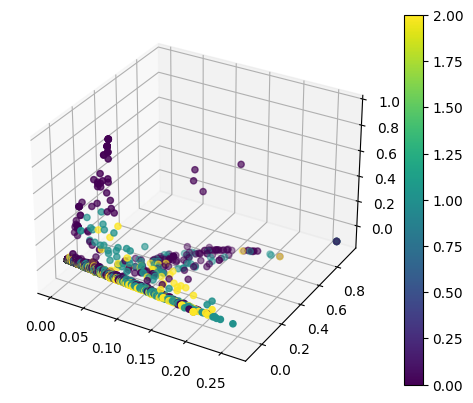

In [164]:
lsa = TruncatedSVD(n_components=3, random_state=42)
lsa_matrix = lsa.fit_transform(X)
x, y, z = lsa_matrix[:, 0], lsa_matrix[:, 1], lsa_matrix[:, 2]
plot_3d(X, x, y, z, clusters)

------------------------------------------------------------------------

In [165]:
X['cluster_label'] = kmeans.labels_
X['true_label'] = combined_df['0']

In [166]:
biology_cluster = X[X['cluster_label'] == 0]
chemistry_cluster = X[X['cluster_label'] == 1]
physics_cluster = X[X['cluster_label'] == 2]

In [167]:
bio_counts = np.array(biology_cluster['true_label'].value_counts())
chem_counts = np.array(chemistry_cluster['true_label'].value_counts())
physics_counts = np.array(physics_cluster['true_label'].value_counts())

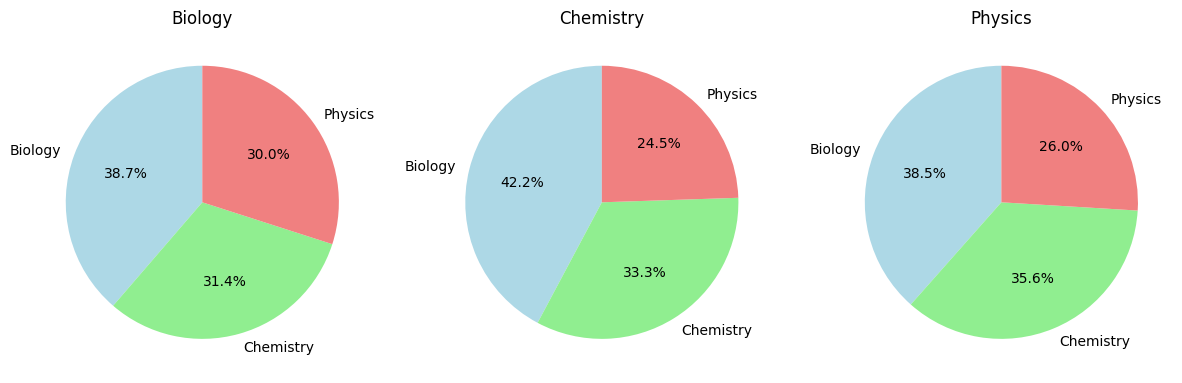

In [168]:
colors = ['lightblue', 'lightgreen', 'lightcoral']
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, counts in enumerate([bio_counts, chem_counts, physics_counts]):
    labels = ['Biology', 'Chemistry', 'Physics']
    axes[i].pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[i].set_title('{}'.format(labels[i]))
    axes[i].set_aspect('equal')
plt.tight_layout()
plt.show()

#Normalizovani podaci

In [169]:
X = data.copy()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [170]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [171]:
get_top_keywords(10, clusters)


Cluster 0
message github compose sujal wikisummarizer wikisummarizerbot optout opt wikipedia wiki

Cluster 1
state reaction level particle mass chemistry thing make physic look

Cluster 2
thy snewd ebooks beep boop shakespeare fordo ncommands shakespeareinsult swapp


primecuje se da su 0 i 1 kao sum

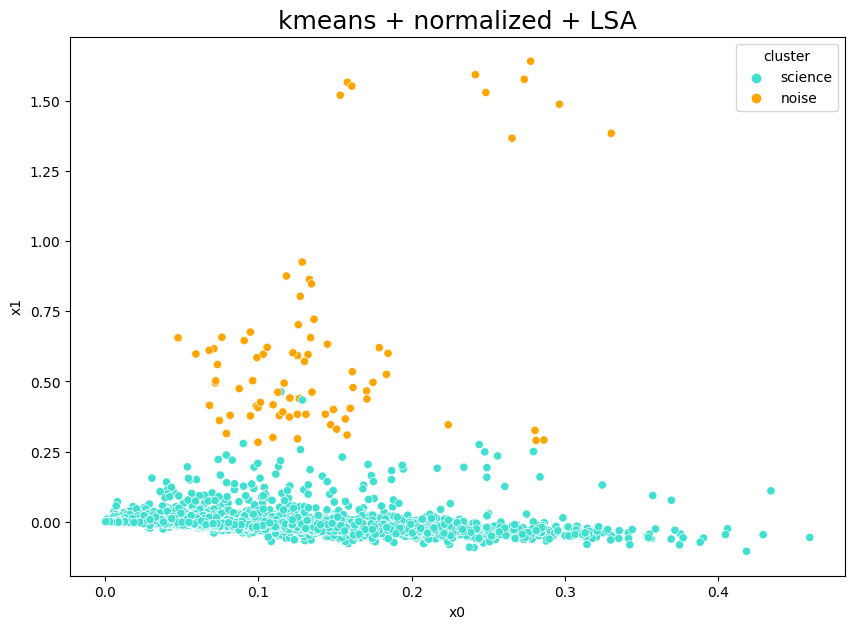

In [172]:
lsa = TruncatedSVD(n_components=2, random_state=42)
lsa_matrix = lsa.fit_transform(X)
x0, x1 = lsa_matrix[:, 0], lsa_matrix[:, 1]
cluster_map = {0: "noise", 1: "science", 2: "noise"}
plot_reduced(X, x0, x1, clusters, cluster_map, "kmeans + normalized + LSA")

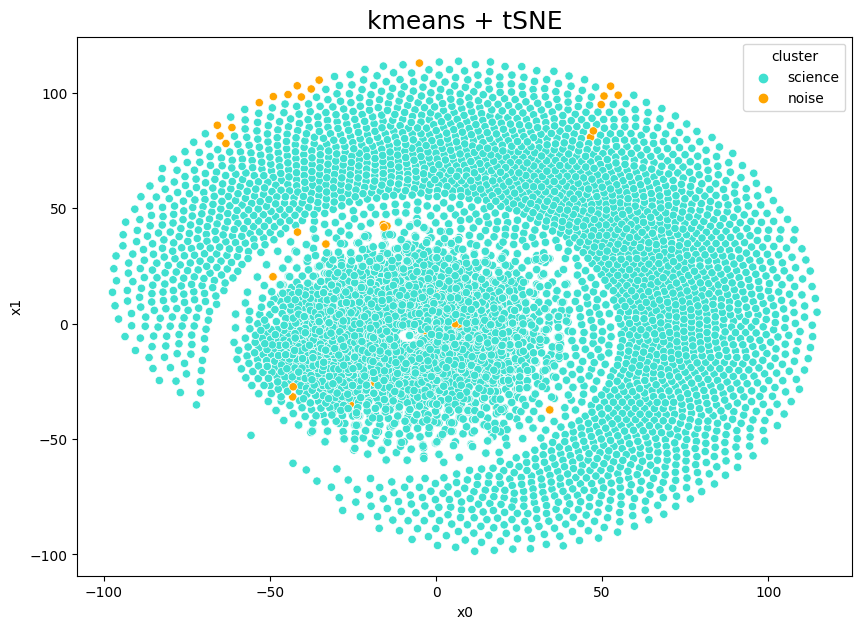

In [173]:
tsne = TSNE(n_components=2, random_state=42)
tsne_matrix = tsne.fit_transform(X)
x0, x1 = tsne_matrix[:, 0], tsne_matrix[:, 1]
cluster_map = {0: "noise", 1: "science", 2: "noise"}
plot_reduced(X, x0, x1, clusters, cluster_map, "kmeans + tSNE")

#Trazenje optimalnog broja klastera na redukovanim podacima

kmeans nece dati dobre rezultate na podacima redukovanim pomocu tSNE zbog oblika koji se dobije

In [174]:
X = data.copy()

In [ ]:
lsa = TruncatedSVD(n_components=2, random_state=42)
lsa_matrix = lsa.fit_transform(X)

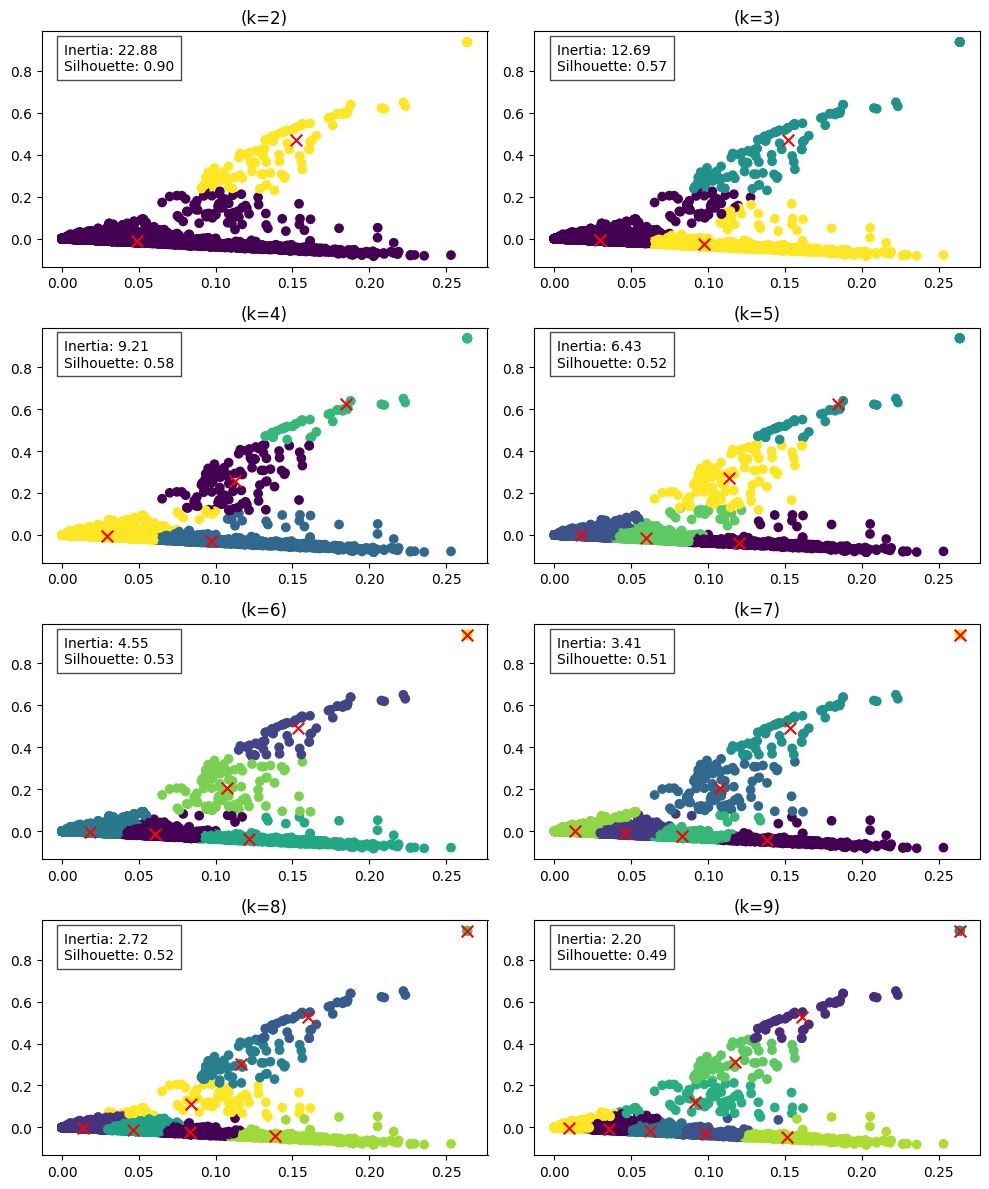

In [ ]:
K, inertias, silhouettes, clusters = plot_iterations(lsa_matrix, lsa_matrix)

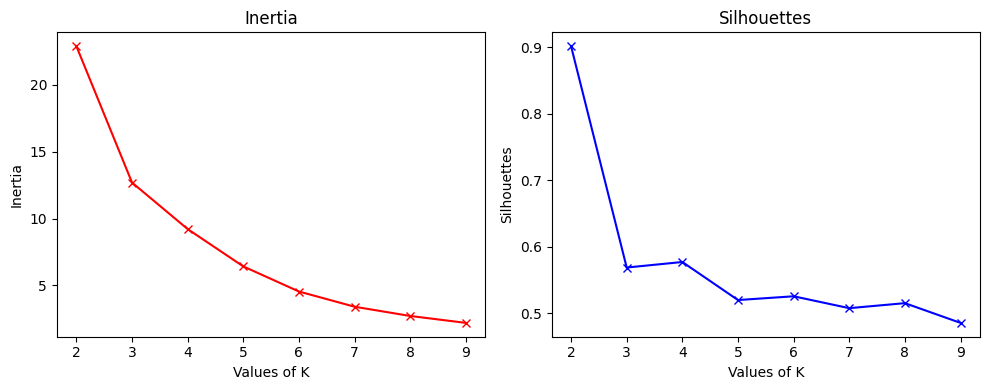

In [ ]:
plot_metrics(K, inertias, silhouettes)

najbolji rez za 2,3,4

#Bez transformacija

In [ ]:
lsa = TruncatedSVD(n_components=2, random_state=42)
lsa_matrix = lsa.fit_transform(X)

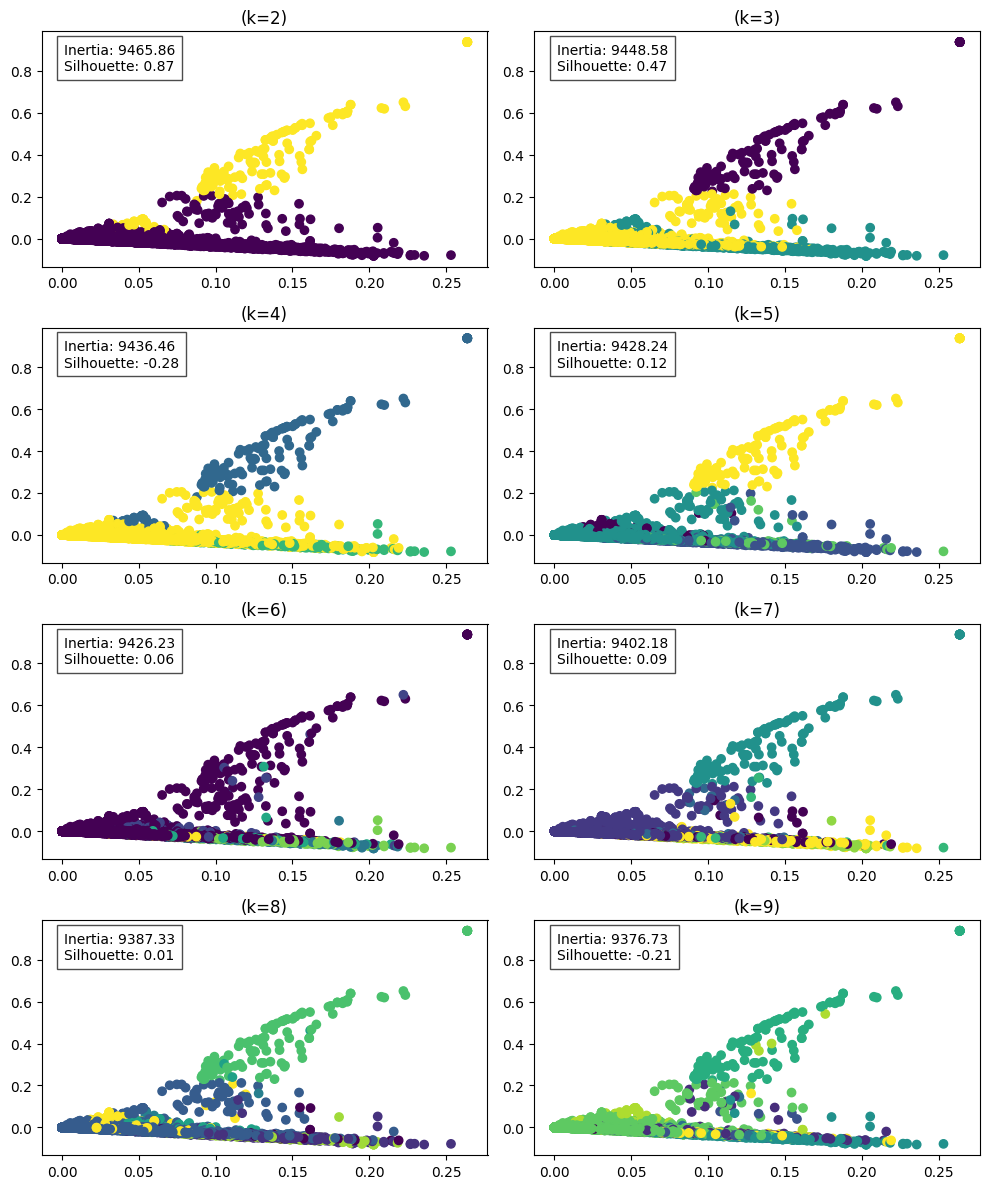

In [ ]:
K, inertias, silhouettes, clusters, best_model = plot_iterations(X, lsa_matrix)

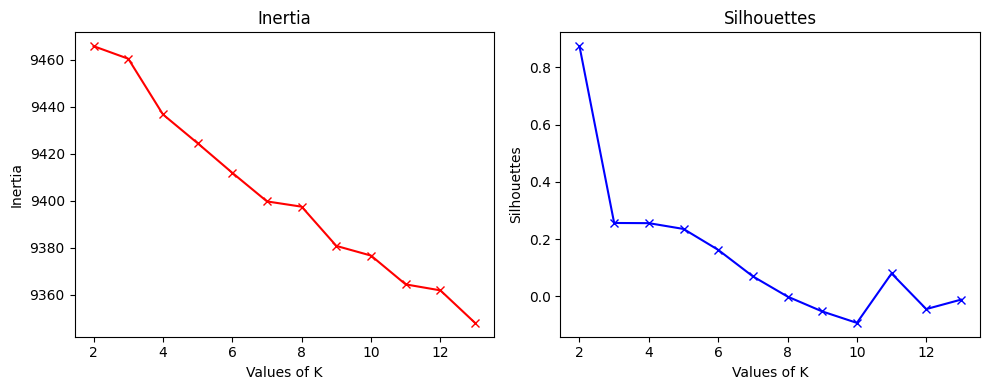

In [ ]:
plot_metrics(K, inertias, silhouettes)

najbolje za k = 2

In [ ]:
best_model

KMeans(n_clusters=2, n_init=10)

In [ ]:
joblib.dump(best_model, 'kmeans_model.joblib')

['kmeans_model.joblib']